#  Visualizing Ford GoBike System
## by Nancy Harrington

## Investigation Overview

> In the investigation of the Ford GoBike system I wanted to see the most common customer characteristics.  Some of those characteristics included the start and end times, trip duration, user type, and the bike share for all trip. I wanted to look further and compaire how those characteristics affected one another.  

## Dataset Overview

> The Ford GoBike system is a regional public bike sharing system in the San Francisco Bay area.  It began it's operation in 2013 with 700 bicycles and 70 stations. It changed names from Bay Area Bike Share to the Ford GoBike in the summer of 2017 and has since changed names again to Bay Wheels. It now has over 2,600 bicycles and 262 stations and is projected to expand to over 7,000 bicycles and 540 stations in the San Francisco, Oakland, Berkeley, Emeryville, and San Jose areas. 

>The bicycles are available 24 hours a day, seven days a week for periods ranging from a single ride (up to 30 minutes) to a day pass, in 30-minute increments, or customers can purchase an annual subscription which gives them unlimited rides up to 45-minutes in duration. Single rides cost 2 dollars per trip, day passes cost 10 dollars per day, and memberships cost 15 dollars per month or 149 dollars per year.

>A reduced pricing option called "Bike Share for All" exists for users who qualify for CalFresh, the SFMTA's Lifeline pass, or PG & E's CARE discount. The reduced price is 5 dollars a year for the first year and 5 dollars amonth in subsequent years. This membership option provides rides of 60 minutes without an additional charge. As of January 2018, around 15% of the membership of the bikeshare system used the Bike Share for All option

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('ford_master_clean.csv')


## Trip Duration

> This will show us the trip duration from month to month during the 2019 year.

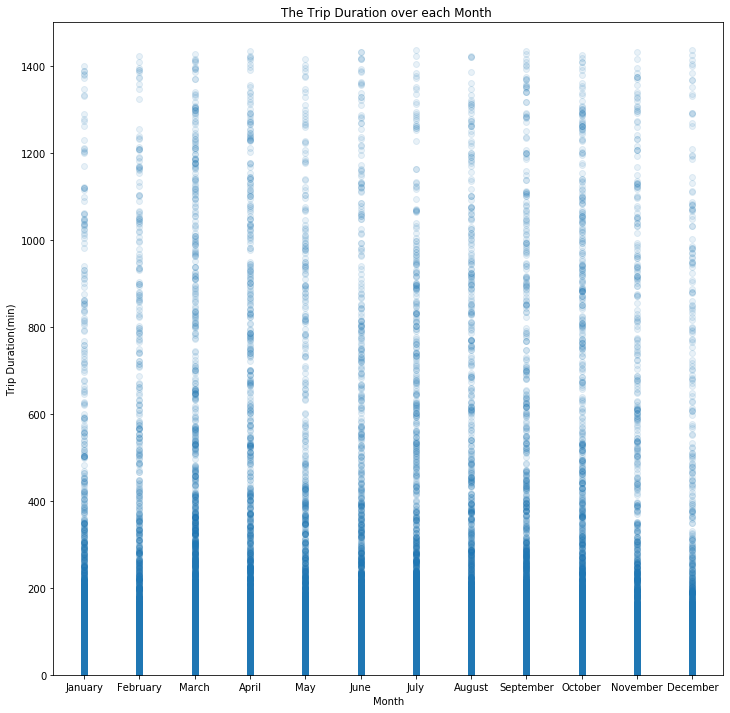

In [22]:
# look and check the trip duration changes over each month.
plt.figure(figsize = [12,12]) # make the whole figure bigger 
plt.scatter(data = df_clean , x = 'start_time_month' , y = 'duration_min' , alpha = 0.1 )
plt.ylim(0,1500)
plt.title('The Trip Duration over each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

## Seasonal Trip Duration

> This is showing us the seasonal trip duration over the year. As we can see Summer and Fall have longer trip durations than winter or spring. 

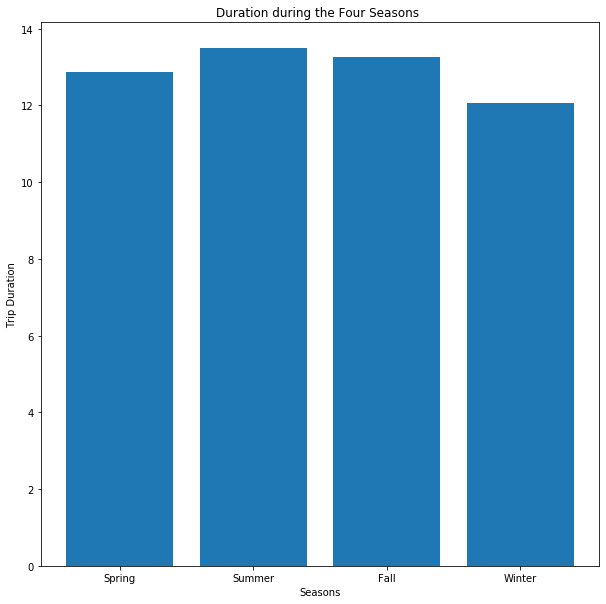

In [23]:
# lets create 4 season categories
plt.figure(figsize = [10, 10])
spring_dur = df_clean.query('start_time_month_num in ["3" , "4" , "5"]' ).duration_min.mean ()
summer_dur = df_clean.query('start_time_month_num in ["6" , "7" , "8"] ').duration_min.mean()
fall_dur = df_clean.query('start_time_month_num in ["9" , "10" , "11"] ').duration_min.mean()
winter_dur = df_clean.query('start_time_month_num in ["12" , "1" , "2"]' ).duration_min.mean()



plt.bar(['Spring','Summer','Fall','Winter'],[spring_dur , summer_dur , fall_dur , winter_dur] )
plt.title('Duration during the Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

## Monthly Trip Duration

> The trip duration hovers around the same time for the subscribers througout the year.  You can see that the trip duration is higher for the customers who are more than likely tourist.

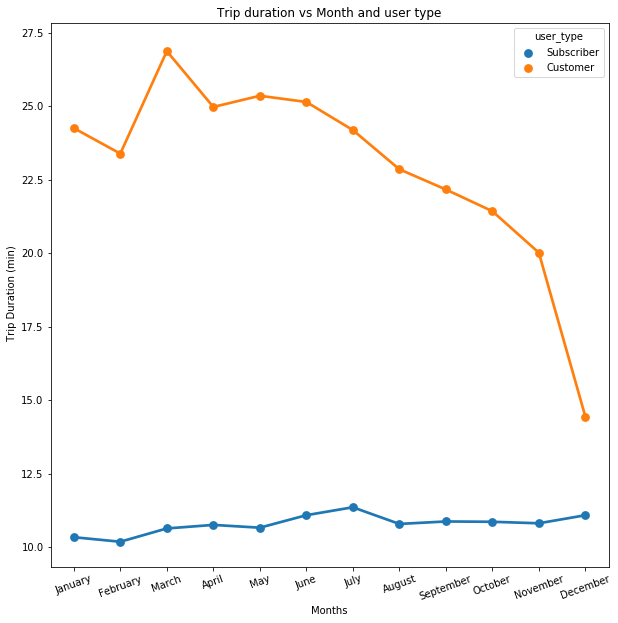

In [21]:
fig = plt.figure(figsize = [10,10])
sb.pointplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'user_type', ci=None)
plt.title('Trip duration vs Month and user type')
plt.ylabel(' Trip Duration (min)')
plt.xlabel('Months')
plt.xticks(rotation=20)
plt.show();

## Weekday Trip duration

> The trip duration is significally different for subscriber and customers. As you can see subscribers have typically less than a 15 minute trip duration.

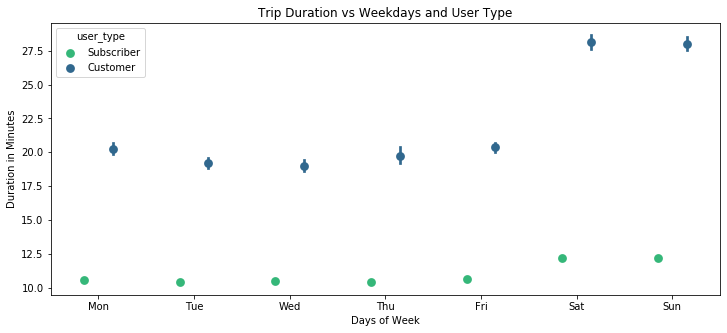

In [19]:
plt.figure(figsize = [12, 5])
sb.pointplot(data = df_clean, x = 'start_time_weekday', y = 'duration_min', hue = 'user_type' , palette = 'viridis_r', dodge = 0.3, linestyles = "", order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Duration vs Weekdays and User Type')
plt.xlabel('Days of Week')
plt.ylabel('Duration in Minutes');

## Days of the week

> This is the number of rentals during the days of the week for the year. Tuesday was the most popular rental day for subscribers and Friday was the most popular rental days for customers.



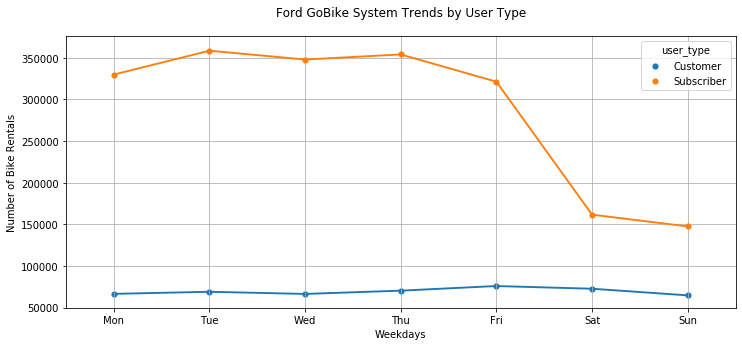

In [25]:
plt.figure(figsize=(12, 5))

df_clean_user_week = df_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_clean_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05)
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Rentals');
plt.grid()

## Bike Share for All

> I wanted to see how popular the bike share for all program was, you need to be a subscriber to utilize the program. I thought it would be a more popular program option.

<Figure size 720x720 with 0 Axes>

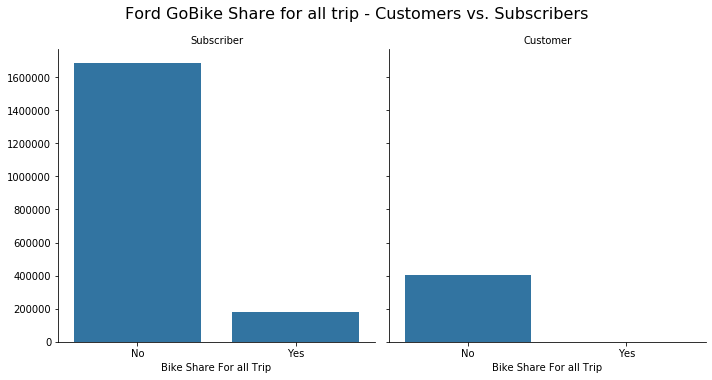

In [24]:
# bike_share_for_all_trip vs. user_type
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 10])
graph = sb.catplot(data=df_clean, x='bike_share_for_all_trip', col="user_type", kind='count', color = base_color);

graph.set_axis_labels("Bike Share For all Trip", "");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike Share for all trip - Customers vs. Subscribers', y=1.05, fontsize=16);

## Start Time for Customers

> The heat map shows us the most popular start times for customers during the week. Breakfast and Dinner times were more popular during the week and lunch time is more popular on the weekend.

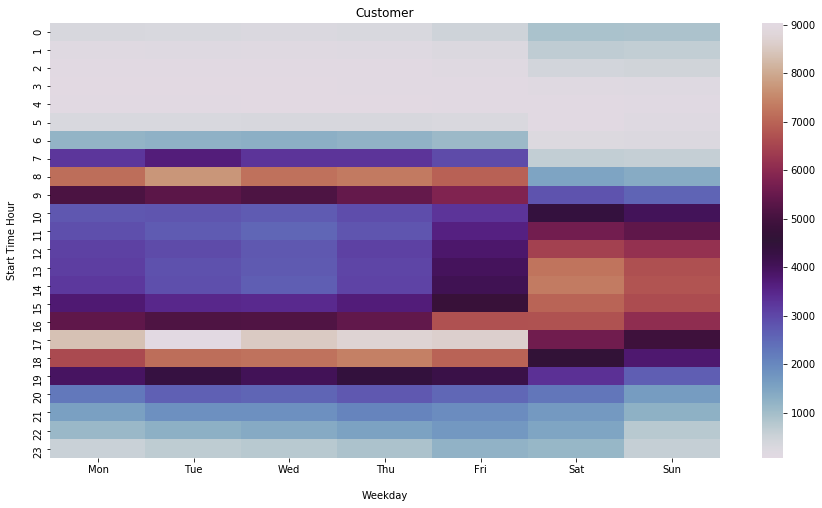

In [13]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

plt.figure(figsize=(15,8))

# Heatmap - Customers
#plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')

heat_map = sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

## Start Time for Subscribers

> The most popular start time for subscribers are during the week and comute morning and evening hours. The weekends are pretty slow showing that the subscribers use the system for traveling to and from work. 

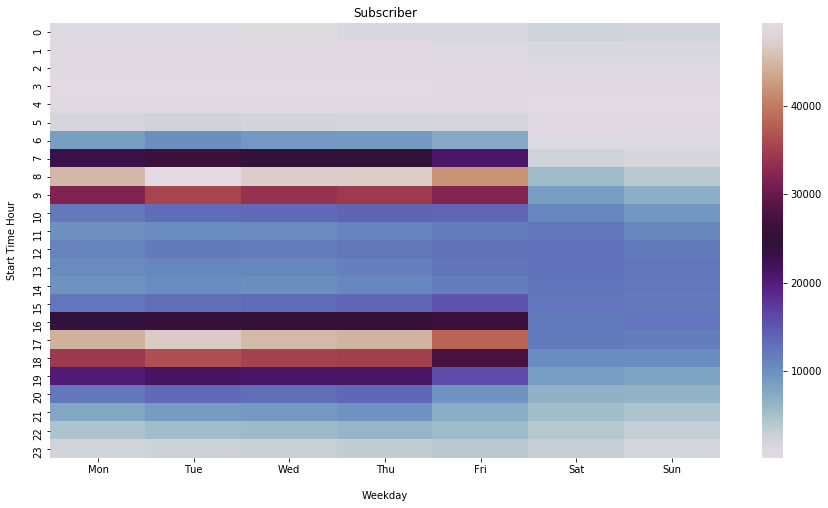

In [14]:
# Heatmap - Subscribers
#plt.subplot(1, 2, 2)
plt.figure(figsize=(15,8))
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()